In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset and Extracting the Independent and Dependent variables
df = pd.read_csv("1000_Companies.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [3]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [4]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

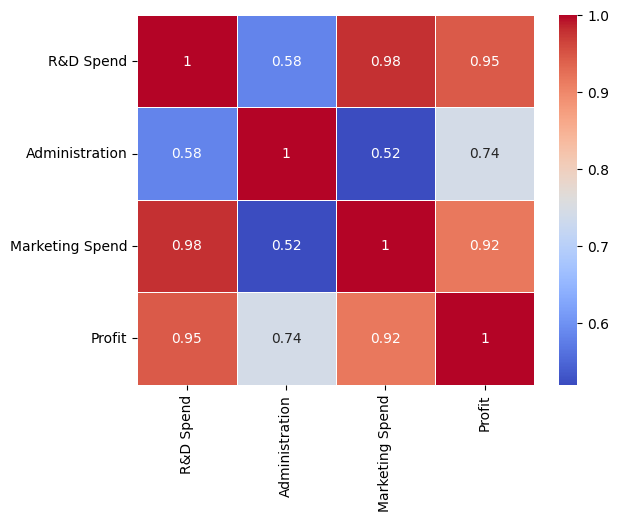

In [8]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidth=.5)
plt.show()

In [9]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3])],remainder='passthrough')
X = ct.fit_transform(X)

In [10]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [11]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [12]:
print(X)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [0.0 0.0 100275.47 241926.31 227142.82]
 [0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 1.0 161181.72 270939.86 295442.17]]


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 20)

In [14]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [15]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [16]:
y_pred

array([ 64690.60564873, 125294.63023737,  79319.44837243, 170413.04034915,
       103159.26938666,  90732.67166551, 158452.57133548, 139546.36442883,
       164227.56038313, 102692.88300933, 165901.68083293,  77891.13195139,
       150829.0247577 , 108911.29136798, 141849.57454674, 111352.83092346,
        58610.65411853, 112669.20259439, 165190.61107618,  85623.75761665,
       185649.86797429,  90543.42823979,  87449.28812748,  50286.40221464,
       162810.59854555, 160968.20308853,  53519.47694888, 176792.82011013,
        74496.29178255,  93572.77213719,  76332.38891432, 115400.06039502,
       133882.43808248,  96100.81786536, 150632.5301023 ,  95509.9556985 ,
       178049.74744601,  95375.4720484 , 101408.21006493,  84875.58110402,
        83501.16148661, 130057.24417712, 121104.15132218, 186414.69818649,
       117131.27183656, 117824.2196496 ,  86838.78944556,  59891.4902335 ,
        60367.36891189, 175161.12046279,  71846.31263904,  87211.97729191,
       125649.90738663,  

In [17]:
# Calculating the Coefficients
print(model.coef_)

[-3.53203714e+02  8.21164518e+01  5.65489241e-01  1.03528284e+00
  7.49230235e-02]


In [18]:
# Calculating the Intercept
print(model.intercept_)

-70713.24150872456


In [19]:
# Calculating the R squared value
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred) *100
# Print evaluation metrics
print(f"Root squared Error:{r2:.2f}%.")

Root squared Error:98.46%.


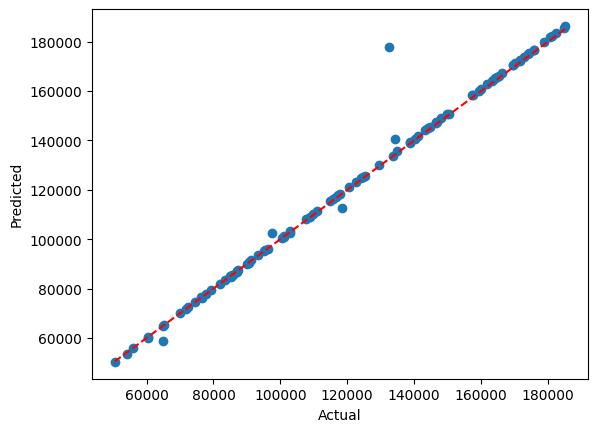

In [20]:
# Plot the actual vs. predicted values as a scatter plot with a best fit line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

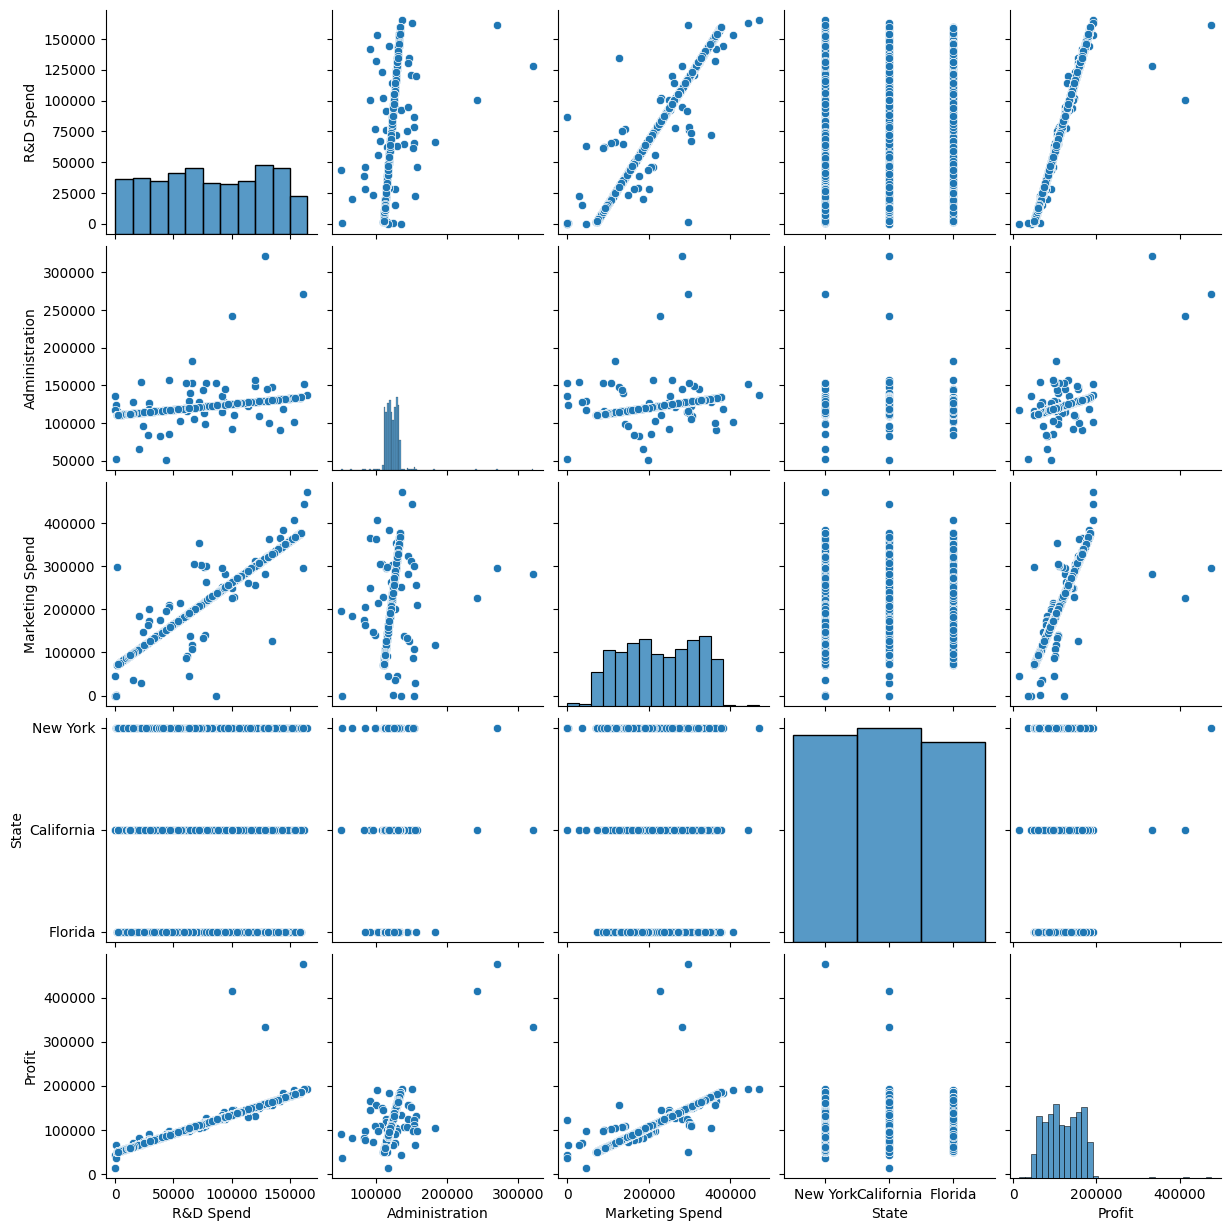

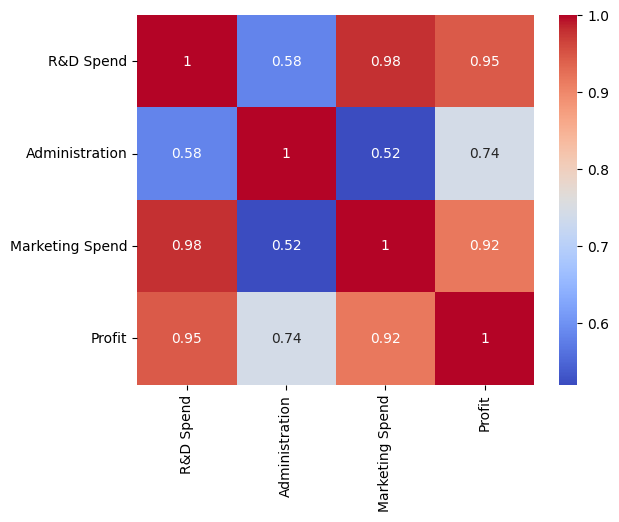

In [21]:
# Plot scatterplot matrix
sns.pairplot(df, x_vars=df.iloc[:0:2], y_vars=df.iloc[:3])
plt.show()

# Plot heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
import pickle

In [23]:
# # Saving model to disk
pickle.dump(model, open('Linear_Regression.pkl','wb'))

In [25]:
# # Loading model to compare the results
model_check = pickle.load(open('Linear_Regression.pkl','rb'))
input_data = np.array([[98190,124958.2421,258236.9123,0,0]])
y_val = model_check.predict(input_data)